In [8]:
import os
import PyPDF2
import pandas as pd

def extract_text(pdf_path):
    '''
    this function extractss text data from pdf
    '''
    text = ''
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
        return text

def extract_text_all(dir):
    '''
    This function looks through the pdfs of a category folder, pass them to extract_text()
    and extracts text data and add them to a dictionary:category (folder name) and resume 
    (containing text data). After looking through all pdfs in all category folder, resulted 
    Dictionary is later converted to datframe.
    '''
    data = []
    for folder in os.listdir(dir):
        folder_path = os.path.join(dir, folder)
        for filename in os.listdir(folder_path):
            if filename.endswith('.pdf'):
                pdf_path = os.path.join(folder_path, filename)
                text = extract_text(pdf_path)
                data.append({'category': folder, 'resume': text})
    df = pd.DataFrame(data)
    return df


dir = r'D:\work\job task\business solutions nlp\data\data'
resumes = extract_text_all(dir)
print(resumes.head())
resumes.to_csv(r'D:\work\job task\business solutions nlp\resumes.csv', index=False)


     category                                             resume
0  ACCOUNTANT  ACCOUNTANT\nSummary\nFinancial Accountant spec...
1  ACCOUNTANT  STAFF ACCOUNTANT\nSummary\nHighly analytical a...
2  ACCOUNTANT  ACCOUNTANT\nProfessional Summary\nTo obtain a ...
3  ACCOUNTANT  SENIOR ACCOUNTANT\nExperience\nCompany Name\n ...
4  ACCOUNTANT  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...


In [22]:
categpries = resumes['category'].value_counts().reset_index()
categpries

,category,count
0,INFORMATION-TECHNOLOGY,120
1,BUSINESS-DEVELOPMENT,120
2,ACCOUNTANT,118
3,ADVOCATE,118
4,FINANCE,118
5,ENGINEERING,118
6,CHEF,118
7,FITNESS,117
8,AVIATION,117
9,SALES,116


C:\Users\Rafid\AppData\Local\Temp\ipykernel_4324\3658598655.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categpries['category'], y=categpries['count'], palette='cool')


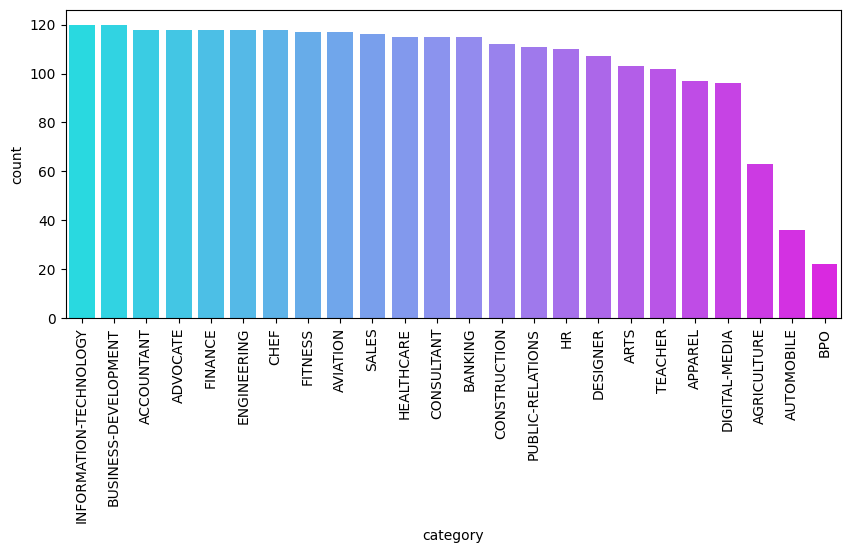

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

### visualizing sample distributoin of the dataset

plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
sns.barplot(x=categpries['category'], y=categpries['count'], palette='cool')
plt.savefig (r'D:\work\job task\business solutions nlp\figs\class_distrbution.png',bbox_inches ="tight",pad_inches = 1)
plt.show()

In [46]:
import re
import string
import pandas as pd
import nltk
from bs4 import BeautifulSoup


def clean_text(text):
    '''
    this function takes individual samples in the dataframe and looks through 
    the text of a sample and removes less useful characters/words, thus cleaning 
    the samples leaving more meaningful words relating to the domain of the category.
    '''

    text=str(text) #forcing the text characters to be string 
    text = text.lower()# Convert text to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)# Remove URLs
    text = re.sub(r'@\S+', ' ', text)# Remove mentions 
    text = re.sub(r'#\S+', ' ', text)# Remove hashtags
    text = BeautifulSoup(text, "html.parser").get_text()# Remove HTML 
    text = re.sub(r'\S+@\S+', '', text)# Remove email
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_{|}~"""), ' ', text)# Remove punctuation
    text = re.sub(r'\d+', '', text)# remove numerical digits
    text = re.sub(r'\b\w\b', '', text)# remove single-character words
    text = re.sub(r'\s+', ' ', text).strip()# Remove extra whitespace
    return text


resumes = pd.read_csv(r'D:\work\job task\business solutions nlp\resumes.csv')
resumes['resume'] = resumes['resume'].apply(clean_text)
print(resumes.head())
    
resumes.to_csv(r'D:\work\job task\business solutions nlp\cleaned_resumes7.csv', index=False)

     category                                             resume
0  ACCOUNTANT  accountant summary financial accountant specia...
1  ACCOUNTANT  staff accountant summary highly analytical and...
2  ACCOUNTANT  accountant professional summary to obtain posi...
3  ACCOUNTANT  senior accountant experience company name june...
4  ACCOUNTANT  senior accountant professional summary senior ...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rafid\anaconda3\envs\resumenlp\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


dict_keys(['state', 'company', 'city', 'management', 'name', 'customer', 'service', 'sale', 'skill', 'business', 'project', 'system', 'team', 'client', 'new', 'development', 'experience', 'training', 'manager', 'work', 'process', 'program', 'product', 'account', 'information', 'marketing', 'office', 'employee', 'financial', 'support', 'professional', 'education', 'including', 'staff', 'report', 'data', 'communication', 'operation', 'year', 'design', 'university', 'student', 'managed', 'plan', 'quality', 'developed', 'analysis', 'member', 'time', 'high'])


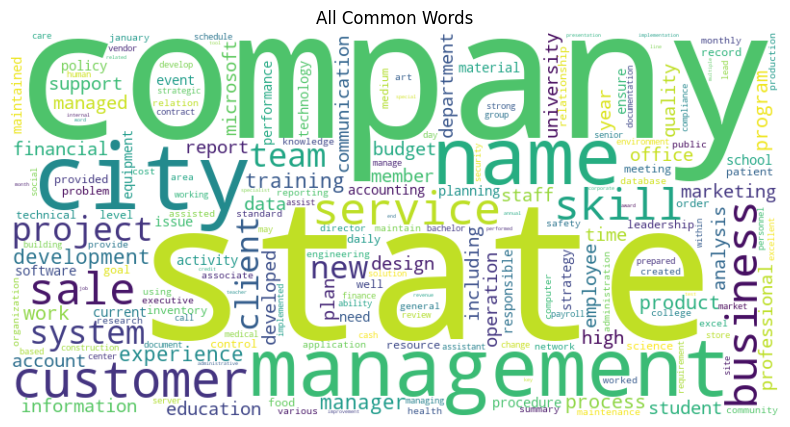

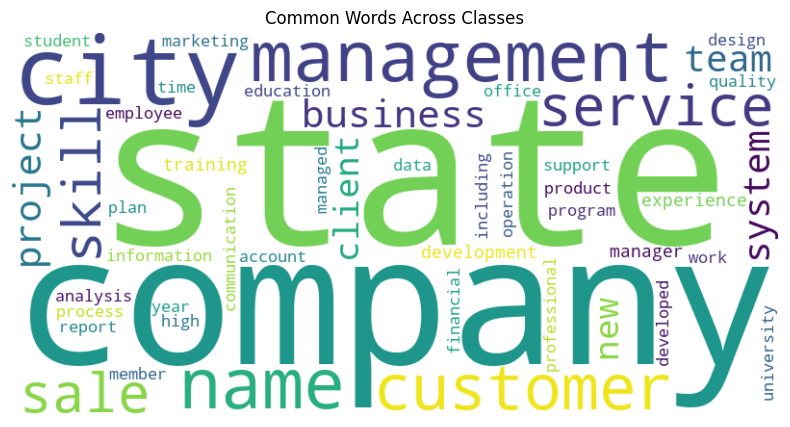

In [47]:
import re
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

'''
This function can generate wordclouds viualizing the most common words in the whole dataset
andwords acrosss all classes.

Initial idea was to remove class wise common words as they hold minor value in defining the category. 
This was later not utilized as BERT did not benefite from this as most of the words add some context 
# to a sentence and bert is contextt based
'''

def get_common_words(text):
    text = text.fillna('').astype(str)
    text_all = ' '.join(text)
    words = re.findall(r'\b\w+\b',text_all.lower())
    words = [word for word in words if word not in stop_words]
    word_count = Counter(words)
    return word_count

def remove_common_words(text, common_words):
    if not isinstance(text,str):
        return text
    words = text.split()
    words_filter = [word for word in words if word not in common_words]
    return ' '.join(words_filter)

def visualize_word_cloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

resumes = pd.read_csv(r'D:\work\job task\business solutions nlp\cleaned_resumes6.csv')

class_common_words = {}
all_common_words = Counter()

for category, group in resumes.groupby('category'):
    common_words = get_common_words(group['resume'])
    class_common_words[category] = set(common_words.keys())
    all_common_words.update(common_words)

common_all_classes = set.intersection(*class_common_words.values())
common_all_classes_ = {word: all_common_words[word] for word in common_all_classes}


top_common_words = dict(Counter(common_all_classes_).most_common(50))
print(top_common_words .keys())

visualize_word_cloud(all_common_words, "All Common Words")
visualize_word_cloud(top_common_words , "Common Words Across Classes")

#resumes['resume'] = resumes['resume'].apply(lambda x: remove_common_words(x, set(top_common_words .keys())))

#resumes.to_csv(r'D:\work\job task\business solutions nlp\cleaned_resumes6_rmv50.csv', index=False)


In [19]:
from sklearn.model_selection import train_test_split
import pandas as pd


'''
splitting dataset into train:val:test with ratio 70:10:30
'''
resumes = pd.read_csv(r'D:\work\job task\business solutions nlp\cleaned_resumes7.csv')

train_set_main, test_set = train_test_split(df_resumes, test_size=0.20, random_state=42)
train_set, val_set = train_test_split(train_set_main, test_size=0.13, random_state=42)

# Save the resulting datasets
train_set.to_csv(r'D:\work\job task\business solutions nlp\train_dataset_clen7.csv', index=False)
val_set.to_csv(r'D:\work\job task\business solutions nlp\val_dataset_clen7.csv', index=False)
test_set.to_csv(r'D:\work\job task\business solutions nlp\test_dataset_clen7.csv', index=False)


In [51]:
import pandas as pd
import random
from tqdm import tqdm
import nlpaug.augmenter.word as naw
import nltk


#nltk.download('wordnet')

aug_synonym = naw.SynonymAug(aug_src='wordnet')
aug_antonym = naw.AntonymAug()
aug_swap = naw.RandomWordAug(action="swap")
aug_delete = naw.RandomWordAug(action="delete")

def random_aug(text):

    '''
    This function performs data augmentation on the text data. Here for augmenting the dataset
    Easy Data Augmentation is applied as it is very effective and suitable for case sensative 
    texts such as resume.

    Here four types of augmentation is randomly performed: synonym, antonym, swapping word 
    places and deleting random words.
    
    '''
    random_number = random.randint(0, 2)
    if random_number == 0:
        aug_text = aug_synonym.augment(text)
    elif random_number == 1:
        aug_text = aug_antonym.augment(text)
    elif random_number == 2:
        aug_text = aug_swap.augment(text)
    #elif random_number == 3:
     #   aug_text = aug_delete.augment(text)
    return aug_text


train_set = pd.read_csv(r'D:\work\job task\business solutions nlp\train_dataset_clen7.csv')

max = 120#### specifying how many samples are needed in each category

labels = train_set['category'].unique()
resume = []
category = []


for label in tqdm(labels):
    length = len(train_set[train_set['category'] == label])
    if length <max:
        loop_range = max-length # determining how many new samples are needed to be created
        df = train_set[train_set['category'] == label].sample(frac=1).reset_index(drop=True)
        for _ in range(loop_range):
            text = df.iloc[0]['resume']
            aug_text = random_aug(text)
            #aug_text = random_aug(aug_text)
            #aug_text = random_aug(aug_text)
            resume.append(aug_text)
            category.append(label)


aug_data = pd.DataFrame({"resume": resume, "category": category})
aug_train_set = pd.concat([train_set, aug_data], ignore_index=True)

print(aug_train_set['category'].value_counts())

aug_train_set.to_csv(r'D:\work\job task\business solutions nlp\aug_train_dataset_clen10_noDel.csv', index=False)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:41<00:00,  1.73s/it]


category
AGRICULTURE               120
SALES                     120
BPO                       120
ADVOCATE                  120
TEACHER                   120
CONSTRUCTION              120
FITNESS                   120
HEALTHCARE                120
APPAREL                   120
HR                        120
ARTS                      120
ENGINEERING               120
DIGITAL-MEDIA             120
INFORMATION-TECHNOLOGY    120
AUTOMOBILE                120
CHEF                      120
BUSINESS-DEVELOPMENT      120
PUBLIC-RELATIONS          120
FINANCE                   120
CONSULTANT                120
BANKING                   120
AVIATION                  120
ACCOUNTANT                120
DESIGNER                  120
Name: count, dtype: int64
